<a href="https://colab.research.google.com/github/sergiogf93/MetNumerics/blob/master/notebooks/04_Interpolation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline
import numpy
import matplotlib.pyplot as plt

# Interpolació

Donat un conjunt discret de valors $(x_i,y_i)$,  

**Definition:**  Given a discrete set of values $y_i$ at locations $x_i$,  un *interpolador* és una funció per parts $f(x)$ que passa exactament per les dades (*i.e.* $f(x_i) = y_i$).

## Aplicacions

- Emplenament de dades
- Aproximació de funcions
- Part fonamental en altres algoritmes:
  - Trobar arrels de funcions (mètode de les secants)
  - Optimització, trobar extrems (interpolació successiva de paràboles)
  - Integració i diferenciació numèrica

## Interpolació polinòmica

**Teorema** Existeix una *única* funció polinòmica de grau $N$,  $\mathcal{P}_N(x)$, que passa exactament pels $N+1$ valors $y_1, y_2, \ldots, y_N, y_{N+1}$ pels *distints* punts $x_1, x_2, \ldots, x_N, x_{N+1}$.

Conseqüència del nombre de paràmetres desconeguts a $\mathcal{P}_N(x)$.

#### Exercici 1: 2 punts

Donats els punts $(x_0, y_0)$ i $(x_1, y_1)$ que defineixen una recta $P_1(x) = p_1 x + p_0$

Fes servir els punts per trobar $p_0$ i $p_1$:

 ##### Resposta


$$y_0 = p_1 x_0 + p_0 \quad \Rightarrow \quad p_0 = y_0 - p_1 x_0$$
$$\begin{aligned}
    y_1 &= p_1 x_1 + p_0 & \Rightarrow \\
    y_1 &= p_1 x_1 + y_0 - p_1 x_0 & \Rightarrow \\
    p_1 &= \frac{y_1 - y_0}{x_1 - x_0} & \Rightarrow \\
    p_0 &= y_0 - \frac{y_1 - y_0}{x_1 - x_0} x_0 &
\end{aligned}$$

$$\mathcal{P}_1(x) = \frac{y_1 - y_0}{x_1 - x_0} x + y_0 - \frac{y_1 - y_0}{x_1 - x_0} x_0 = \frac{y_1 - y_0}{x_1 - x_0} (x - x_0) + y_0$$

#### Exercici 2:  3 punts

Donat que els punts són $(x_0, y_0)$, $(x_1, y_1)$, i $(x_2, y_2)$. Podem obtenir un polinomi quadràtic.

Sigui $\mathcal{P}_2(x) = p_0 x^2 + p_1 x + p_2$, obtenim les següents equacions:

$$y_0 = p_2 x_0^2 + p_1 x_0 + p_0$$

$$y_1 = p_2 x_1^2 + p_1 x_1 + p_0$$

$$y_2 = p_2 x_2^2 + p_1 x_2 + p_0$$

Això s'està complicant molt ràpidament!

### Demostració - Unicitat de polinomis interpoladors

Sigui 

$$\mathcal{P}_N(x) = \sum^N_{n=0} p_n x^n $$
o
$$\mathcal{P}_N(x) = p_0 + p_1 x + \cdots + p_{N - 1} x^{N - 1} + p_{N} x^N$$

i requerim que $\mathcal{P}_N(x_i) = y_i$ for $i=0,1,\ldots,N$ and $x_i \neq x_j ~~~ \forall i,j$.

Considerem l'existència d'un altre polinomi

$$Q_N(x) = \sum^N_{n=0} q_n x^n$$

que també compleix la condició $Q_N(x_i) = y_i$.  

Calcula $T_N(x) = \mathcal{P}_N(x) - Q_N(x)$:

Sabem que $T_N(x_i) = 0$ però i per la resta de les $x$?

$$T_N(x) = \mathcal{P}_N(x) - Q_N(x) = \sum^N_{n=0} p_n x^n - q_n x^n = \sum^N_{n=0} (p_n - q_n) x^n$$

Però $T_N(x_i) = 0$implica que $p_n - q_n = 0$ individualment i per tant $\mathcal{P}_N(x) = Q_N(x)$.

### Base monomial

Sigui $\mathcal{P}_N(x) = \sum^N_{n=0} p_n x^n$, $\mathcal{P}_N(x)$ pot ser representat com a *combinació lineal* dels monomis

$$1, x, x^2, x^3, \ldots, x^{N-1}, x^N$$ 

amb pesos

$$p_0, p_1, p_2, p_3, \ldots, p_{N-1}, \text{i } p_N$$

respectivament.

#### Exercici 3:  Base monomial

Considera $\mathcal{P}_3(x) = p_0 + p_1 x + p_2 x^2 + p_3 x^3$ amb quatre punts with $(x_i, y_i), ~~ i = 0,1,2,3$. Tenim quatre equacions i quatre paràmetres desconeguts com és d'esperar:

$$\mathcal{P}_3(x_0) = p_0 + p_1 x_0 + p_2 x_0^2 + p_3 x_0^3 = y_0$$

$$\mathcal{P}_3(x_1) = p_0 + p_1 x_1 + p_2 x_1^2 + p_3 x_1^3 = y_1$$

$$\mathcal{P}_3(x_2) = p_0 + p_1 x_2 + p_2 x_2^2 + p_3 x_2^3 = y_2$$

$$\mathcal{P}_3(x_3) = p_0 + p_1 x_3 + p_2 x_3^2 + p_3 x_3^3 = y_3$$

Si considerem la forma matricial:

$$\vec{x} = \begin{bmatrix} x_0 \\ x_1 \\ x_2 \\ x_3 \end{bmatrix} \quad \vec{y} = \begin{bmatrix} y_0 \\ y_1 \\ y_2 \\ y_3 \end{bmatrix} \quad \vec{p} = \begin{bmatrix} p_0 \\ p_1 \\ p_2 \\ p_3 \end{bmatrix}$$

Definim la matriu de *Vandermonde* com

$$
V = \begin{bmatrix} 
     1 & x_0 & x_0^2 & x_0^3 \\
     1 & x_1 & x_1^2 & x_1^3 \\
     1 & x_2 & x_2^2 & x_2^3 \\
     1 & x_3 & x_3^2 & x_3^3
\end{bmatrix}
$$

la qual ens permet escriure el sistema lineal d'equacions com $V \vec{p} = \vec{y}$:

$$\begin{bmatrix} 
     1 & x_0 & x_0^2 & x_0^3 \\
     1 & x_1 & x_1^2 & x_1^3 \\
     1 & x_2 & x_2^2 & x_2^3 \\
     1 & x_3 & x_3^2 & x_3^3
\end{bmatrix} \begin{bmatrix} p_0 \\ p_1 \\ p_2 \\ p_3 \end{bmatrix} = \begin{bmatrix} y_0 \\ y_1 \\ y_2 \\ y_3 \end{bmatrix}$$

Les matrius de Vandermonde es defineixen en general com

$$V = \begin{bmatrix} 
    1      & x_0    & x_0^2  & \cdots & x_0^N  \\
    1      & x_1    & x_1^2  & \cdots & x_1^N  \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    1      & x_m    & x_m^2  & \cdots & x_m^N  \\
\end{bmatrix}
$$

on $V$ és una matriu $m \times N$ amb els punts $(x_i, y_i)$ per $i = 0, 1, 2, 3, \ldots m$ i per un ordre $N$ polinomial $\mathcal{P}_N(x)$.

### Trobar els $p_i$

Els coeficients de $\mathcal{P}_N(x)$ es poden obtenir solucionant el sistema d'equacions d'abans. Hi ha funcions a `numpy`que ho fan, com ara:
 - `numpy.polyfit(x, y, x.shape[0] - 1)`
 - `numpy.vander(x, N=None)` per construir la matriu i utilitzar una rutina de solucions lineal

També podem considerar una base que sigui més fàcil d'utilitzar.

### Base Lagrangiana

Donats $N+1$ punts $(x_0,y_0), (x_1,y_1), \ldots, (x_{N},y_{N})$ on assumim altra vegade que els $x_i$ són tots diferents, el polinomi interpolador $\mathcal{P}_N(x)$ es pot escriure com

$$\mathcal{P}_N(x) = \sum^{N}_{i=0} y_i \ell_i(x)$$

on 

$$\ell_i(x) = \prod^{N}_{j=0, j \neq i} \frac{x - x_j}{x_i - x_j} = \frac{x - x_0}{x_i - x_0} \frac{x - x_1}{x_i - x_1} \cdots \frac{x - x_{i-1}}{x_i - x_{i-1}}\frac{x - x_{i+1}}{x_i - x_{i+1}} \cdots \frac{x - x_{N}}{x_i - x_{N}}$$

Noteu que $\ell_i(x_i) = 1$ i $\forall j\neq i, ~~ \ell_i(x_j) = 0$.

#### Exercici 4:  $N = 1$ Polinomi de Lagrange

Donats dos punts $(x_0, y_0)$ i $(x_1, y_1)$ els termes de Lagrange de $\mathcal{P}_N(x)$ són

$$\ell_0(x) = \frac{x - x_1}{x_0 - x_1}$$

i

$$\ell_1(x) = \frac{x - x_0}{x_1 - x_0}$$

de manera que

$$\mathcal{P}_1(x) = \ell_0(x) \cdot y_0 + \ell_1(x) \cdot y_1 = \frac{x - x_1}{x_0 - x_1} \cdot y_0 + \frac{x - x_0}{x_1 - x_0} \cdot y_1$$

In [0]:
data = numpy.array([[-1.5, -0.5], [0.0, 0.5]])
# data = numpy.array([[-1.5, -0.5], [0.0, 0.5], [-0.5, 1.0]])
N = data.shape[0] - 1
M = data.shape[0]
x = numpy.linspace(-2.0, 2.0, 100)

# ====================================================
# Compute the Lagrange basis (\ell_i(x))
def lagrange_basis(x, data):
    """Compute Lagrange basis at x given data"""
    basis = numpy.ones((data.shape[0], x.shape[0]))
    for i in range(data.shape[0]):
        for j in range(data.shape[0]):
            if i != j:
                basis[i, :] *= (x - data[j, 0]) / (data[i, 0] - data[j, 0])
    return basis

# ====================================================
# Calculate full polynomial
def poly_interpolant(x, data):
    """Compute polynomial interpolant of (x,y) using Lagrange basis"""
    P = numpy.zeros(x.shape[0])
    basis = lagrange_basis(x, data)
    for n in range(data.shape[0]):
        P += basis[n, :] * data[n, 1]
    return P

# ====================================================
# Plot individual basis functions
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
basis = lagrange_basis(x, data)
for i in range(N + 1):
    axes.plot(x, basis[i, :], label="$\ell_{%s}(x)$" % i)

axes.set_title("Lagrange Basis $\ell_i(x)$")
axes.set_xlabel("x")
axes.set_ylabel("$\ell_i(x)$")
axes.legend(loc=8)

# Plot full polynomial P_N(x)
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.plot(x, poly_interpolant(x, data), label="$P_{%s}(x)$" % N)
for point in data:
    axes.plot(point[0], point[1], 'ko')
axes.set_title("$P_N(x)$")
axes.set_xlabel("x")
axes.set_ylabel("$P_N(x)$")
    
plt.show()

#### Exercici 5: Interpolació de $sin(2\pi x)$

Utilitza el codi anterior que genera la base Lagrangiana per fer una interpolació de $\sin$ a l'interval $x \in [-1, 1]$.  

- Quin és el resultat per $N =4$? $N =5$? $N = 6$? $N \to \infty$?
- Fes gràfiques de la base Lagrangiana, el polinomi interpolador i de l'error entre $f(x)$ i $P_N(x)$.

In [0]:
# Genera N punts (x_i,y_i) en l'interval [-1,1] tal que y_i = sin(2*pi*x_i)

# Modifica el codi anterior pel cas f(x) = sin(2*pi*x)


In [0]:
#@title
num_points = 4
# num_points = 5
# num_points = 6
# num_points = 20
data = numpy.empty((num_points, 2))
data[:, 0] = numpy.linspace(-1, 1, num_points)
data[:, 1] = numpy.sin(2.0 * numpy.pi * data[:, 0])
N = data.shape[0] - 1 # Degree of polynomial
M = data.shape[0]
x = numpy.linspace(-1.0, 1.0, 100)

# ====================================================
# Plot individual basis functions
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
basis = lagrange_basis(x, data)
for i in range(N + 1):
    axes.plot(x, basis[i, :], label="$\ell_{%s}(x)$" % i)

axes.set_title("Lagrange Basis $\ell_i(x)$")
axes.set_xlabel("x")
axes.set_ylabel("$\ell_i(x)$")
axes.legend(loc=1)

# Plot full polynomial P_N(x)
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.plot(x, poly_interpolant(x, data), label="$P_{%s}(x)$" % N)
axes.plot(x, numpy.sin(2.0 * numpy.pi * x), 'r--', label="True $f(x)$")
for point in data:
    axes.plot(point[0], point[1], 'ko')
axes.set_title("$P_N(x)$")
axes.set_xlabel("x")
axes.set_ylabel("$P_N(x)$")
axes.legend(loc=1)

# Plot error
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.plot(x,numpy.abs(poly_interpolant(x, data) - numpy.sin(2.0 * numpy.pi * x)))
axes.set_xlabel("x")
axes.set_ylabel("$|P_N(x) - f(x)|$")
    
plt.show()

#### Exercici 6: Funció de Runge

Fes una interpolació de $f(x) = \frac{1}{1 + 25 x^2}$ a l'interval $x \in [-1, 1]$.

- Amb $N =4$
- Amb $N = 10$
- Incrementa el nombre de punts a la interpolació i observa què passa.


In [0]:
# Modifica el codi anterior pel cas f(x) = 1/(1+25*x**2)

In [0]:
#@title
def f(x):
    return 1.0 / (1.0 + 25.0 * x**2)

x = numpy.linspace(-1, 1, 100)
# x = numpy.linspace(-2, 2, 100)

num_points = 4
# num_points = 10
# num_points = 20
data = numpy.empty((num_points, 2))
data[:, 0] = numpy.linspace(-1, 1, num_points)
data[:, 1] = f(data[:, 0])
N = data.shape[0] - 1
    
# Plot the results
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)

axes.plot(x, poly_interpolant(x, data), 'b', label="$P_6(x)$")
axes.plot(x, f(x), 'k', label="True $f(x)$")
axes.plot(data[:, 0], data[:, 1], 'ro', label="data")
          
axes.set_title("Interpolation of Runge's function")
axes.set_xlabel("x")
axes.set_ylabel("y")
axes.legend(loc=1)

plt.show()

#### Exercici 7: Funció "Monstre" de Weierstrass

Definida com
$$
    f(x) = \sum^\infty_{n=0} a^n \cos(b^n \pi x)
$$
de manera que
$$
    0 < a < 1 \quad \text{and} \quad a b > 1 + \frac{3\pi}{2}.
$$

Aquesta funció és contínua a tot punt però no és derivable enlloc.ere.

In [0]:
# Defineix la funció Monstre de Weierstrass 
def f(x,a,N):
  pass
  
# Utilitza el codi anterior per fer una interpolació de f a de [-1,1]

In [0]:
#@title
def f(x, a=0.9, N=100):
    summation = 0.0
    b = (1.0 + 3.0 / 2.0 * numpy.pi) / a + 0.01
    print(b)
    for n in range(N + 1):
        summation += a**n * numpy.cos(b**n * numpy.pi * x)
    return summation

x = numpy.linspace(-1, 1, 1000)
# x = numpy.linspace(-2, 2, 100)

num_points = 10
data = numpy.empty((num_points, 2))
data[:, 0] = numpy.linspace(-1, 1, num_points)
data[:, 1] = f(data[:, 0])
N = data.shape[0] - 1
    
# Plot the results
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)

axes.plot(x, poly_interpolant(x, data), 'b', label="$P_6(x)$")
axes.plot(x, f(x), 'k', label="True $f(x)$")
axes.plot(data[:, 0], data[:, 1], 'ro', label="data")
          
axes.set_title("Interpolation of Weierstrass's Monster function")
axes.set_xlabel("x")
axes.set_ylabel("y")
axes.legend(loc=1)

plt.show()

### Rules of Thumb

- Evita interpoladors d'ordre elevat sempre que sigui possible! Augmenta el el nombre de punts per veure què passa.
- Evita fer extrapolacions. Prova a incrementar el rang de $x$ en els exemples anteriors i observa si l'aproximació de l'interpolador mes enllà de l'interval de mostar és bona.


### Anàlisi d'errors

**Teorema**  Lagrange's Remainder Theorem - Sigui $f(x) \in C^{N+1}[-1, 1]$, llavors
$$
    f(x) = \mathcal{P}_N(x) + R_N(x)
$$
on $\mathcal{P}_N(x)$ iés el polinomi interpolador i
$$
    R_N(x) = Q(x) \frac{f^{(N+1)}(c)}{(N+1)!} \quad \text{amb} \quad c \in [-1,1]
$$
on
$$
    Q(x) = \prod^N_{i=0} (x - x_i) = (x-x_0)(x-x_1)\cdots(x-x_N) .
$$

Coses a prendre en compte:
- Pel Teorema de Lagrange l'error es cancel·la per tots $x_i$.
  - Per minimitzar $R_N(x)$ es requereix minimitzar $|Q(x)|$ per $x \in [-1, 1]$.

#### Minimització de $R_N(x)$

Minimitzar l'error $R_N(x)$ al teorema de Lagrange és equivalent a minimitzar $|Q(x)|$ per $x \in [-1, 1]$.

Minimitzar l'error $\Leftrightarrow$ trobar les arrels de $Q(x)$ o prendre els punts d'interpolació. Com fem això?


### Polinomis de Chebyshev

Els *polinomis de Chebyshev* $T_N(x)$ són una altra base que es pot utilitzar per l'interpolació.

Els primers 5 polinomis:

$$T_0(x) = 1$$

$$T_1(x) = x$$

$$T_2(x) = 2 x^2 - 1$$

$$T_3(x) = 4 x^3 - 3 x$$

$$T_4(x) = 8x^4 - 8x^2 + 1$$

In [0]:
def cheb_poly(x, N):
    """Compute the *N*th Chebyshev polynomial and evaluate it at *x*"""
    T = numpy.empty((3, x.shape[0]))
    T[0, :] = numpy.ones(x.shape)
    T[1, :] = x
    if N == 0:
        return T[0, :]
    elif N == 1:
        return T[1, :]
    else:
        for k in range(2, N + 1):
            T[2, :] = 2.0 * x * T[1, :] - T[0, :]
            T[0, :] = T[1, :]
            T[1, :] = T[2, :]
    
        return T[2, :]

x = numpy.linspace(-1, 1, 100)

fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)

for n in range(5):
    axes.plot(x, cheb_poly(x, n), label="$T_%s$" % n)

axes.set_ylim((-1.1, 1.1))
axes.set_title("Chebyshev Polynomials")
axes.set_xlabel("x")
axes.set_ylabel("$T_N(x)$")
axes.legend(loc=1)

plt.show()

1.Les arrels dels polinomis de Chebyshev
$$
    x_k = \cos \left (\frac{(2 k - 1) \pi}{2 N} \right ) \quad k = 1, \ldots, N
$$
1.Els extrems dels polinomis de Chebyshev
$$
    x_k = \cos \left( \frac{k \pi}{N} \right) \quad k = 0, \ldots, N
$$



In [0]:
N = 5
x_extrema = numpy.cos(numpy.arange(N + 1) * numpy.pi / N)
x_nodes = numpy.cos((2.0 * numpy.arange(1, N + 1) - 1.0) / (2.0 * N) * numpy.pi)

fig = plt.figure()
# fig.set_figwidth(fig.get_figwidth() * 2)
axes = fig.add_subplot(1, 1, 1)

# Plot points
axes.plot(x_extrema, numpy.zeros(N+1), 'ro')
axes.plot(x_nodes, numpy.zeros(N), 'bo')
    
# Plot some helpful lines
axes.plot((-1.0, -1.0), (-1.1, 1.1), 'k--')
axes.plot((1.0, 1.0), (-1.1, 1.1), 'k--')
axes.plot((-1.0, 1.0), (0.0, 0.0), 'k--')
for i in range(x_extrema.shape[0]):
    axes.plot((x_extrema[i], x_extrema[i]), (-1.1, 1.1), 'r--')
    axes.plot(x_extrema[i], cheb_poly(x_extrema, N)[i], 'ro')

print(x_extrema)
print(numpy.cos(x_extrema))
    
# Plot Chebyshev polynomial
x_hat = numpy.linspace(-1, 1, 1000)
axes.plot(x_hat, cheb_poly(x_hat, N), 'k')
axes.set_xlim((-1.1, 1.1))
axes.set_ylim((-1.1, 1.1))

# Labels
axes.set_title("Chebyshev Nodes and Extrema", fontsize="20")
axes.set_xlabel("x", fontsize="15")
axes.set_ylabel("$T_{N+1}(x)$", fontsize="15")

plt.show()

In [0]:
# First-kind Nesting (3 x)
fig = plt.figure()
# fig.set_figwidth(fig.get_figwidth() * 2)
axes = fig.add_subplot(1, 1, 1)

N = 5
factor = 3
x_1 = numpy.cos((2.0 * numpy.arange(1, N + 1) - 1.0) / (2.0 * N) * numpy.pi)
x_2 = numpy.cos((2.0 * numpy.arange(1, factor * N + 1) - 1.0) / (2.0 * factor * N) * numpy.pi)

axes.plot(x_1, numpy.zeros(N), "ko", color="r", markerfacecolor="red", markersize="15")
axes.plot(x_2, numpy.zeros(N * factor), 'ko', color="b", markersize="10")

x_hat = numpy.linspace(-1, 1, 1000)
axes.plot(x_hat, cheb_poly(x_hat, N), 'k', color='darkred')
axes.plot(x_hat, cheb_poly(x_hat, factor * N), 'k', color='darkblue')
axes.set_xlim((-1.1, 1.1))
axes.set_ylim((-1.1, 1.1))
axes.set_title("Nesting of 1st and 2nd Kind Chebyshev Polynomials")
axes.set_xlabel("$x$")
axes.set_ylabel("$T_N(x)$")
plt.show()

#### Propietats dels polinomis de Chebyshev
1. Definits per la relació de recurrència

   $$T_k(x) = 2 x T_{k-1}(x) - T_{k-2}(x)$$

2. El coeficient de $x^N$ per $T_N(x)$ és $2^{N-1}$ per $N \geq 1$


3. Extrems:

   $$|T_N(x)| \leq 1 \quad \text{per} \quad  -1 \leq x \leq 1$$
 


4. Minimax: El polinomi

   $$T(x) = \frac{T_{N+1}(x)}{2^N}$$
   
   és un *polinomi mònic*,  polinomi en què el coeficient del seu terme de major grau pren el valor 1, que compleix
   
   $$
       \max |T(x)| \leq \max |Q(X)| \quad \text{per} \quad  x \in [-1, 1], \quad \text{i}
   $$
   $$
       \max |T(x)| = \frac{1}{2^N}
   $$
   
   Recorda que el terme resta al Teorema de Lagrange era:
   $$
        R_N(x) = Q(x) \frac{f^{(N+1)}(c)}{(N+1)!} \quad \text{amb} \quad c \in [-1,1]
   $$
   on
   $$
        Q(x) = \prod^N_{i=0} (x - x_i) = (x-x_0)(x-x_1)\cdots(x-x_N) .
   $$

#### Anàlisi de reducció de l'error

Donat que els polinomis de Chebyshev són mínims a l'interval $[-1, 1]$ voldríem que $T(x) = Q(x)$. 

Com que només sabem les arrels de $Q(x)$ (els $x_i$) requerim que aquestes siguin les arrels del polinomi de Chebyshev $T_{N+1}(x)$ cosa que implica $T(x) = Q(x)$.

Com hem dit abans, les arrels de $T_N(x)$ a l'interval $[-1, 1]$ satisfan
$$
    x_k = \cos\left( \frac{(2k - 1) \pi}{2 N} \right ) \quad \text{per} \quad k=1, \ldots, N
$$

Prenent com a mostra de dades per interpolació aquests punts minimitzarà, doncs, l'error.

In [0]:
x = numpy.linspace(0, numpy.pi, 100)
N = 15

fig = plt.figure()
axes = fig.add_subplot(1, 1, 1, aspect="equal")

axes.plot(numpy.cos(x), numpy.sin(x), 'r--')
axes.plot(numpy.linspace(-1.1, 1.1, 100), numpy.zeros(x.shape), 'r')
for k in range(1, N + 1):
    location = [numpy.cos((2.0 * k - 1.0) * numpy.pi / (2.0 * N)),
                numpy.sin((2.0 * k - 1.0) * numpy.pi / (2.0 * N))]
    axes.plot(location[0], location[1], 'ko')
    axes.plot(location[0], 0.0, 'ko')
    axes.plot([location[0], location[0]], [0.0, location[1]], 'k--')
    
axes.set_xlim((-1.1, 1.1))
axes.set_ylim((-0.1, 1.1))
plt.show()

#### Resum

1. Minimitzar l'error al Teorema de Lagrange és equivalent a minimitzar:
$$
    |Q(x)| \quad \text{for} \quad x \in [-1, 1].
$$
1. Sabem que els polinomis de Chebyshev són mínims a l'interval $[-1, 1]$ per tant voldríem $T(x) = Q(x)$.
1. Com que només sabem les arrels de $Q(x)$ (els $x_i$) requerim que aquestes siguin les arrels del polinomi de Chebyshev $T_{N+1}(x)$ cosa que implica $T(x) = Q(x)$.
1. Les arrels de $T_N(x)$ a l'interval $[-1, 1]$ satisfan
$$
    x_k = \cos\left( \frac{(2k - 1) \pi}{2 N} \right ) \quad \text{per} \quad k=1, \ldots, N
$$
Prenent com a mostra de dades per interpolació aquests punts minimitzarà, doncs, l'error.

**Noteu**

- Els nodes de Chebyshev minimitzen l'error d'interpolació per qualsevol base (degut a la unicitat del polinomi interpolador).

#### Exercici 8

Escriu un codi que per la funció de Runge:

$$ f(x) = \frac{1}{1 + 25 x^2}$$

genera un array de punts (x_i,f(x_i)):

- On els x_i són equidistants.
- On els x_i són els nodes de Chebyshev

In [0]:
def f(x):
    return 1.0 / (1.0 + 25.0 * x**2)

# Parameters
x = numpy.linspace(-1, 1, 100)
num_points = 25

# ============================================================
#  Equidistant nodes

# ============================================================
#  Chebyshev nodes


In [0]:
#@title
def f(x):
    return 1.0 / (1.0 + 25.0 * x**2)

# Parameters
x = numpy.linspace(-1, 1, 100)
num_points = 25

# ============================================================
#  Equidistant nodes
equidistant_data = numpy.empty((num_points, 2))
equidistant_data[:, 0] = numpy.linspace(-1, 1, num_points)
equidistant_data[:, 1] = f(equidistant_data[:, 0])
N = equidistant_data.shape[0] - 1

P_lagrange = poly_interpolant(x, equidistant_data)

# ============================================================
#  Chebyshev nodes
chebyshev_data = numpy.empty((num_points, 2))
chebyshev_data[:, 0] = numpy.cos((2.0 * numpy.arange(1, num_points + 1) - 1.0) * numpy.pi / (2.0 * num_points))
chebyshev_data[:, 1] = f(chebyshev_data[:, 0])

P_cheby1 = poly_interpolant(x, chebyshev_data)
    
# Fit directly with Chebyshev polynomials
coeff = numpy.polynomial.chebyshev.chebfit(chebyshev_data[:, 0], chebyshev_data[:, 1], N)
P_cheby2 = numpy.polynomial.chebyshev.chebval(x, coeff)

# Check on unique polynomials
print(numpy.allclose(P_cheby1, P_cheby2))

# ============================================================
# Plot the results
fig = plt.figure()
fig.subplots_adjust(hspace=.5)

axes = fig.add_subplot(2, 1, 1)
axes.plot(x, P_lagrange, 'b', label="$P_%s(x)$" % N)
axes.plot(x, f(x), 'k', label="True $f(x)$")
axes.plot(equidistant_data[:, 0], equidistant_data[:, 1], 'ro', label="data")
axes.set_title("Interpolation of Runge's function at Equispaced Points")
axes.set_xlabel("x")
axes.set_ylabel("y")
axes.legend(loc=8)
print(numpy.linalg.norm(P_lagrange - f(x)))

axes = fig.add_subplot(2, 1, 2)
axes.plot(x, f(x), 'k', label="True $f(x)$")
axes.plot(x, P_cheby1, 'b', label="$P_%s(x)$" % N)
axes.plot(chebyshev_data[:, 0], chebyshev_data[:, 1], 'ro', label="data")
          
axes.set_title("Interpolation of Runge's function at Chebyshev Points")
axes.set_xlabel("x")
axes.set_ylabel("y")
axes.legend(loc=1)
print(numpy.linalg.norm(P_cheby1 - f(x)))


plt.show()

## Interpolació polinomial definida a trossos

Donats $N$ punts, utilitza polinomis de baix ordre per interpolar la funció a trossos. Podem escollir l'ordre dels polinomis i la continuïtat:

 - $C^0$: L'interpolador és continu
   - Interpolació lineal
   - Interpolació quadràtica
 - $C^1$: L'interpolador i la seva primera derivada són contínues
   - Polinomi Cúbic d'Hermite (PCHiP)
 - $C^2$: L'interpolador, la primera i la segona derivada són contínues.
   - Cubic splines

### Lineal a trossos

Donat un segment entre els punts $(x_k, y_k)$i $(x_{k+1}, y_{k+1})$ definim el segment com

$$\mathcal{P}_k(x) = \frac{y_{k+1} - y_k}{x_{k+1} - x_k} (x - x_k) + y_k$$

L'interpolador final $\mathcal{P}(x)$ és llavors definit sobre $[x_k, x_{k+1}]$ utilitzant aquesta funció.

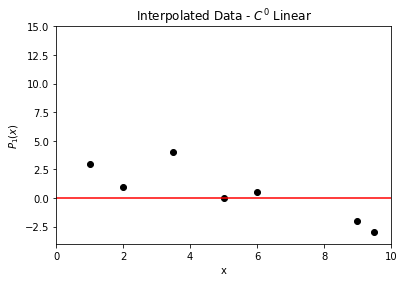

In [14]:
data = numpy.array([[1.0, 3.0], [2.0, 1.0], [3.5, 4.0], [5.0, 0.0], [6.0, 0.5], [9.0, -2.0], [9.5, -3.0]])
x = numpy.linspace(0.0, 10, 100)
N = data.shape[0] - 1

# Construeix un array P_linear de mida x.shape que per cada x doni el valor de 
# l'interpolador lineal a trossos
P_linear = numpy.zeros(x.shape)
#
#
#

# Plot
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)

axes.plot(data[:,0], data[:,1], 'ko')
axes.plot(x, P_linear, 'r')

axes.set_title("Interpolated Data - $C^0$ Linear")
axes.set_xlabel("x")
axes.set_ylabel("$P_1(x)$")
axes.set_xlim([0.0, 10.0])
axes.set_ylim([-4.0, 15.0])

plt.show()

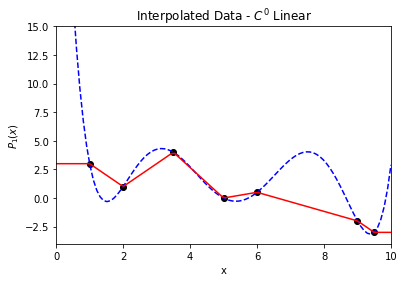

In [15]:
#@title
data = numpy.array([[1.0, 3.0], [2.0, 1.0], [3.5, 4.0], [5.0, 0.0], [6.0, 0.5], [9.0, -2.0], [9.5, -3.0]])
x = numpy.linspace(0.0, 10, 100)
N = data.shape[0] - 1

# Lagrange Basis
P_lagrange = poly_interpolant(x, data)

# C^0 Piece-wise linear
# P_pw_linear = numpy.interp(x, data[:, 0], data[:, 1])
P_linear = numpy.zeros(x.shape)
for n in range(1, N + 1):
    P_linear += ((data[n, 1] - data[n - 1, 1]) / (data[n, 0] - data[n - 1, 0]) * (x - data[n - 1, 0]) 
                         + data[n - 1, 1]) * (x > data[n - 1, 0]) * (x <= data[n, 0])
# Add end points for continuity
P_linear += numpy.ones(x.shape) * data[0, 1] * (x < data[0, 0])
P_linear += numpy.ones(x.shape) * data[-1, 1] * (x >= data[-1, 0])

# Plot
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)

axes.plot(data[:,0], data[:,1], 'ko')
axes.plot(x, P_lagrange, 'b--')
axes.plot(x, P_linear, 'r')

axes.set_title("Interpolated Data - $C^0$ Linear")
axes.set_xlabel("x")
axes.set_ylabel("$P_1(x)$")
axes.set_xlim([0.0, 10.0])
axes.set_ylim([-4.0, 15.0])

plt.show()

### Polinomis superposats a trossos

En conjunts de tres punts  $(x_{k+1}, y_{k+1})$, $(x_{k}, y_{k})$, i $(x_{k-1}, y_{k-1})$, trobem l'interpolador quadràtic i definim l'interpolador final $P(x)$ a partir de l'interpolador quadràtic $\mathcal{P}_k(x)$ sobre $[x_{k-1}, x_{k+1}]$.

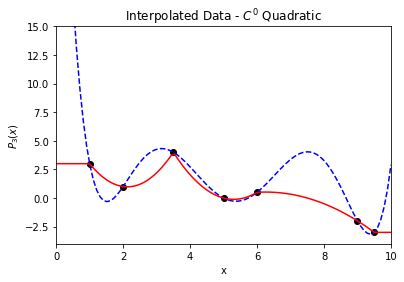

In [16]:
data = numpy.array([[1.0, 3.0], [2.0, 1.0], [3.5, 4.0], [5.0, 0.0], [6.0, 0.5], [9.0, -2.0], [9.5, -3.0]])
x = numpy.linspace(0.0, 10, 100)
N = data.shape[0] - 1

# C^0 Piece-wise quadratic
P_quadratic = numpy.zeros(x.shape)
for k in range(1, N + 1, 2):
    p = numpy.polyfit(data[k - 1:k + 2, 0], data[k - 1:k + 2, 1], 2)
    P_quadratic += numpy.polyval(p, x) * (x > data[k - 1, 0]) * (x <= data[k + 1, 0])
# Add end points for continuity
P_quadratic += numpy.ones(x.shape) * data[0, 1] * (x < data[0, 0])
P_quadratic += numpy.ones(x.shape) * data[-1, 1] * (x >= data[-1, 0])
    
# Plot
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)

axes.plot(data[:,0], data[:,1], 'ko')
axes.plot(x, P_lagrange, 'b--')
axes.plot(x, P_quadratic, 'r')

axes.set_title("Interpolated Data - $C^0$ Quadratic")
axes.set_xlabel("x")
axes.set_ylabel("$P_3(x)$")
axes.set_xlim([0.0, 10.0])
axes.set_ylim([-4.0, 15.0])

plt.show()

### Interpolació cúbica $C^1$ a trossos

En els dos casos anteriors teníem derivades primeres discontínues! Podem millorar-ho imposant condicions sobre els polinomis de manera que als extrems de cada troç els polinomis siguin continus.



Donat un segment entre els punts $(x_k, y_k)$ i $(x_{k+1}, y_{k+1})$ volem interpolar una funció cúbica entre els dos punts.

$$\mathcal{P}_k(x) = p_0 + p_1 x + p_2 x^2 + p_3 x^3$$

$$\mathcal{P}_k(x_k) = y_k, \quad \mathcal{P}_k(x_{k+1}) = y_{k+1}$$

Tenim 4 paràmetres desconeguts però només 2 punts! Si posem condicions sobre la derivada a cada extrem de l'interval obtenim dues noves equacions i llavors podem resoldre l'interpolador.

$$\frac{\text{d}}{\text{dx}} \mathcal{P}_k(x_k) = d_k, \quad \frac{\text{d}}{\text{dx}} \mathcal{P}_k(x_{k+1}) = d_{k+1}$$

A partir del polinomi cúbic trobem:

$$\begin{aligned}
p_0 + p_1 x_k + p_2 x_k^2 + p_3 x_k^3 &= y_k \\
p_0 + p_1 x_{k+1} + p_2 x_{k+1}^2 + p_3 x_{k+1}^3 &= y_{k+1} \\
p_1 +  2p_2 x_k + 3 p_3 x_k^2 &= d_k \\
p_1 + 2 p_2 x_{k+1} + 3 p_3 x_{k+1}^2 &= d_{k+1}
\end{aligned}$$

Si ho reescrivim com un sistema d'equacions:

$$\begin{bmatrix}
    1 & x_k & x_k^2 & x_k^3 \\
    1 & x_{k+1} & x_{k+1}^2 & x_{k+1}^3 \\
    0 & 1 & 2 x_k & 3 x_k^2 \\
    0 & 1 & 2 x_{k+1} & 3 x_{k+1}^2
\end{bmatrix} \begin{bmatrix}
p_0 \\ p_1 \\ p_2 \\ p_3
\end{bmatrix} = \begin{bmatrix}
y_k \\ y_{k+1} \\ d_k \\ d_{k+1}
\end{bmatrix}$$

Comúnment es simplifica el problema re-parametritzant els punts de manera que $(x_k,y_k) \to (0,y_k)$ i $(x_{k+1},y_{k+1}) \to (1,y_{k+1})$ i treballem amb $s \in [0,1]$

Llavors el sistema queda:

$$\begin{bmatrix}
    1 & 0 & 0 & 0 \\
    1 & 1 & 1 & 1 \\
    0 & 1 & 0 & 0 \\
    0 & 1 & 2 & 3
\end{bmatrix} \begin{bmatrix}
p_0 \\ p_1 \\ p_2 \\ p_3
\end{bmatrix} = \begin{bmatrix}
y_k \\ y_{k+1} \\ d_k \\ d_{k+1}
\end{bmatrix}$$

que pot ser resolt i trobem:

$$\begin{aligned}
\mathcal{P}(s) &= (1-s)^2 (1 + 2s) y_k + s^2 (3 - 2 s) y_{k+1} + s (1 - s)^2 d_k - s^2 (1 - s)d_{k+1}\\
\mathcal{P}'(s) &= 6s(s-1) y_k + 6s(1-s) y_{k+1} + (s-1)(3s-1) d_k - s(3s-2) d_{k+1}\\
\mathcal{P}''(s) &= 6 (1-2s)(y_{k+1} - y_k) + (6s - 4) d_k + (6s-2) d_{k+1}
\end{aligned}$$

Ara bé, com escollim $d_k$?

> Bloque con sangría



#### PCHIP

Piecewise Cubic Hermite Interpolation Polynomial

 - Escollim el pendent que conserva la monotonía
- També intentem preservar la forma de les dades
- Noteu que en general aquest interpolador és  $\mathcal{P}_k(x) \in C^1$

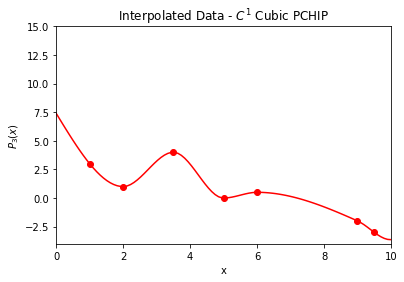

In [17]:
import scipy.interpolate as interpolate

data = numpy.array([[1.0, 3.0], [2.0, 1.0], [3.5, 4.0], [5.0, 0.0], [6.0, 0.5], [9.0, -2.0], [9.5, -3.0]])
x = numpy.linspace(0.0, 10, 100)

# C^1 Piece-wise PCHIP
P_pchip = interpolate.pchip_interpolate(data[:, 0], data[:, 1], x)

# Plot
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)

axes.plot(data[:,0], data[:,1], 'ro')
axes.plot(x, P_pchip, 'r')

axes.set_title("Interpolated Data - $C^1$ Cubic PCHIP")
axes.set_xlabel("x")
axes.set_ylabel("$P_3(x)$")
axes.set_xlim([0.0, 10.0])
axes.set_ylim([-4.0, 15.0])

plt.show()

#### Cubic Splines

Exigeix continuïtat en segones derivades:

$$\mathcal{P}''_{k}(x_{k}) = \mathcal{P}''_{k-1}(x_k)$$

A partir de la nostra generalització d'abans sabem

$$\mathcal{P}''(s) = 6 (1-2s)(y_{k+1} - y_k) + (6s - 4) d_k + (6s-2) d_{k+1}$$

la nostra condició és

$$\mathcal{P}''_{k}(0) = \mathcal{P}''_{k-1}(1)$$

$$\mathcal{P}''_{k-1}(1) = 6 (1-2 \cdot 1)(y_{k} - y_{k-1}) + (6\cdot 1 - 4) d_{k-1} + (6\cdot 1-2) d_{k}$$

$$\mathcal{P}''_{k}(0) = 6 (1-2 \cdot 0)(y_{k+1} - y_k) + (6\cdot 0 - 4) d_k + (6\cdot 0-2) d_{k+1}$$

$$-6(y_{k} - y_{k-1}) + 2 d_{k-1} + 4 d_{k} = 6 (y_{k+1} - y_k) - 4 d_k -2  d_{k+1}$$



Això dóna un conjunt d'equacions lineals per $d_k$ basades en els valors de $y_k$:

$$\begin{bmatrix}
         & \ddots  & \ddots  & \ddots  & &  &\\
         & 0 & 2 & 8 & 2 & 0 & & \\
         & & 0 & 2 & 8 & 2 & 0 & & & \\
         & &   & 0 & 2 & 8 & 2 & 0 & & \\
         & &    & & & \ddots & \ddots & \ddots &
\end{bmatrix}\begin{bmatrix}
    \vdots \\ d_{k-1} \\ d_{k} \\ d_{k+1} \\ \vdots
\end{bmatrix} = \begin{bmatrix}
    \vdots \\ 6 (y_{k} - y_{k-2}) \\ 6 (y_{k+1} - y_{k-1}) \\ 6 (y_{k+2} - y_{k}) \\\vdots
\end{bmatrix}$$

Els $d_k$ encara no estan definits i hem d'escollir alguna regla per especificar els seus valors.

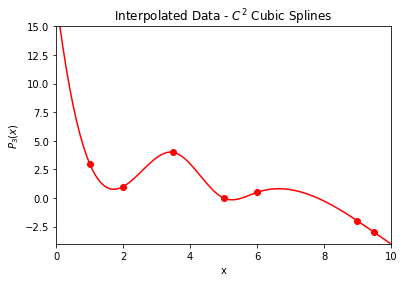

In [18]:
import scipy.interpolate as interpolate

data = numpy.array([[1.0, 3.0], [2.0, 1.0], [3.5, 4.0], [5.0, 0.0], [6.0, 0.5], [9.0, -2.0], [9.5, -3.0]])
x = numpy.linspace(0.0, 10, 100)

# C^2 Piece-wise Splines
# Note that to get an interpolant we need to set the smoothing 
# parameters *s* to 0
P_spline = interpolate.UnivariateSpline(data[:, 0], data[:, 1], s=0)

# Plot
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)

axes.plot(data[:,0], data[:,1], 'ro')
axes.plot(x, P_spline(x), 'r')

axes.set_title("Interpolated Data - $C^2$ Cubic Splines")
axes.set_xlabel("x")
axes.set_ylabel("$P_3(x)$")
axes.set_xlim([0.0, 10.0])
axes.set_ylim([-4.0, 15.0])

plt.show()

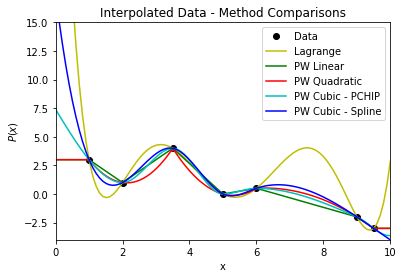

In [19]:
import scipy.interpolate as interpolate

data = numpy.array([[1.0, 3.0], [2.0, 1.0], [3.5, 4.0], [5.0, 0.0], [6.0, 0.5], [9.0, -2.0], [9.5, -3.0]])
x = numpy.linspace(0.0, 10, 100)

# Lagrange Basis
N = data.shape[0] - 1

lagrange_basis = numpy.ones((N + 1, x.shape[0]))
for i in range(N + 1):
    for j in range(N + 1):
        if i != j:
            lagrange_basis[i, :] *= (x - data[j, 0]) / (data[i, 0] - data[j, 0])

# Calculate full polynomial
P_lagrange = numpy.zeros(x.shape[0])
for n in range(N + 1):
    P_lagrange += lagrange_basis[n, :] * data[n, 1]

# C^0 Piece-wise linear
# P_pw_linear = numpy.interp(x, data[:, 0], data[:, 1])
P_linear = numpy.zeros(x.shape)
for n in range(1, N + 1):
    P_linear += ((data[n, 1] - data[n - 1, 1]) / (data[n, 0] - data[n - 1, 0]) * (x - data[n - 1, 0]) 
                         + data[n - 1, 1]) * (x > data[n - 1, 0]) * (x <= data[n, 0])
    
# Add end points for continuity
P_linear += numpy.ones(x.shape) * data[0, 1] * (x < data[0, 0])
P_linear += numpy.ones(x.shape) * data[-1, 1] * (x >= data[-1, 0])
# C^0 Piece-wise quadratic
P_quadratic = numpy.zeros(x.shape)
for k in range(1, N + 1, 2):
    p = numpy.polyfit(data[k - 1:k + 2, 0], data[k - 1:k + 2, 1], 2)
    P_quadratic += numpy.polyval(p, x) * (x > data[k - 1, 0]) * (x <= data[k + 1, 0])
# Add end points for continuity
P_quadratic += numpy.ones(x.shape) * data[0, 1] * (x < data[0, 0])
P_quadratic += numpy.ones(x.shape) * data[-1, 1] * (x >= data[-1, 0])
    
# C^1 Piece-wise PCHIP
P_pchip = interpolate.pchip_interpolate(data[:, 0], data[:, 1], x)

# C^2 Piece-wise Splines
P_spline = interpolate.UnivariateSpline(data[:, 0], data[:, 1], s=0)
    
# Plot
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)

axes.plot(data[:,0], data[:,1], 'ko', label="Data")
axes.plot(x, P_lagrange, 'y', label="Lagrange")
axes.plot(x, P_linear, 'g', label="PW Linear") 
axes.plot(x, P_quadratic, 'r', label="PW Quadratic")
axes.plot(x, P_pchip, 'c', label="PW Cubic - PCHIP")
axes.plot(x, P_spline(x), 'b', label="PW Cubic - Spline")

axes.set_title("Interpolated Data - Method Comparisons")
axes.set_xlabel("x")
axes.set_ylabel("$P(x)$")
axes.legend()
axes.set_xlim([0.0, 10.0])
axes.set_ylim([-4.0, 15.0])

plt.show()

## Relació amb la regressió

Què fem si tenim més dades i volem un polinomi de grau baix i no volem utilitzar un interpolador a trossos?

Les tècniques de regressió són utilitzades normalment per minimitzar algún tipus d'error entre les dades $y_i$ a $x_i$ amb una funció d'aproximació $f(x_i)$. Noteu que això ja NO és interpolació.


### Mínims-quadrats

Una manera de fer això és requerir la minimització de l'error mínim quadrat.
$$
    E = \left( \sum^m_{i=1} |y_i - f(x_i)|^2 \right )^{1/2}.
$$

Pel que hem vist al principi, si volem fitar una línea

$$
    \mathcal{P}_1(x) = p_0 + p_1 x
$$
a $N$ dades tindríem
$$
   \begin{bmatrix}
        1 & x_1 \\
        1 & x_2 \\
        \vdots & \vdots \\
        1 & x_N
   \end{bmatrix} \begin{bmatrix}
       p_0 \\ p_1
   \end{bmatrix} = \begin{bmatrix}
       y_1 \\ y_2 \\ \vdots \\ y_N
   \end{bmatrix}
$$
o bé
$$
    A p = y
$$
Quin problema hi ha amb aquest sistema?




Això condueix a la probabilitat que no hi hagi cap solució del sistema ja que
$$
    A \in \mathbb{R}^{N \times 2}, p \in \mathbb{R}^{2 \times 1}, \text{  i  } y \in \mathbb{R}^{N \times 1}.
$$

En comptes, podem resoldre el sistema relacionat de mínims quadrats
$$
    A^T A p = A^T y
$$

la solució del qual minimitza $E$.

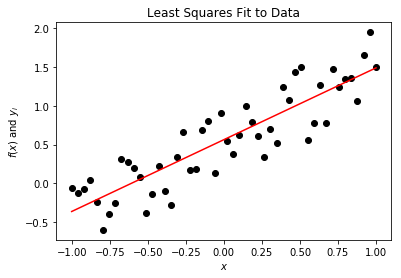

E = 2.0515466450103506


In [20]:
# Linear Least Squares Problem
N = 50
x = numpy.linspace(-1.0, 1.0, N)
y = x + numpy.random.random((N)) 

A = numpy.ones((x.shape[0], 2))
A[:, 1] = x
p = numpy.linalg.solve(numpy.dot(A.transpose(), A), numpy.dot(A.transpose(), y))
# p = numpy.linalg.lstsq(A, y)[0]
f = lambda x: p[0] + p[1] * x
E = numpy.linalg.norm(y - f(x), ord=2)

fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)

axes.plot(x, y, 'ko')
axes.plot(x, f(x), 'r')
axes.set_title("Least Squares Fit to Data")
axes.set_xlabel("$x$")
axes.set_ylabel("$f(x)$ and $y_i$")

plt.show()
print("E = %s" % E)
    

### Let ye be warned...

![curve-fitting methods](https://imgs.xkcd.com/comics/curve_fitting.png)